# All together

- Logistic
- k-NN
- Random Forest

Benchmark entre ellos y competición por equipos

In [ ]:
# Importamos las diferentes librerías
## Nombre de la librería y alias que le ponemos en nuestro notebook
## Los alias con las que las importamos suelen ser muy estandares

# Importar y manipular datos
import pandas as pd

# Graficar datos
import seaborn as sns
import matplotlib.pyplot as plt

# Algebra 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   # 
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")
state = pd.get_dummies(df['State'],drop_first=False)


# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan','State'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip,state],axis=1)



# Creación de nuevas variables

- Considera crear nuevas variables:



1.   Puedes utilizar las del ejercicio 1
2.   Puedes utilizar kmeans o PCA
3. Puedes utilizar variables que se te ocurran visualizando los datos o pensando en el problema



In [ ]:
# New variables
df.head()


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,voice_Yes,ip_Yes,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Separación de train y test


In [ ]:
# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), 
                                                    df['Churn'], test_size=0.25, 
                                                    random_state=101)

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

**Logistic Regression**

In [ ]:
random.seed(113)
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
print(scores['test_roc_auc'].shape)
scores['test_roc_auc']

(20,)


array([0.65732087, 0.77408143, 0.7060576 , 0.71847071, 0.75422046,
       0.73634558, 0.80983118, 0.68023833, 0.68917577, 0.84011917,
       0.73733863, 0.70059583, 0.66633565, 0.78202582, 0.81032771,
       0.80635551, 0.64846077, 0.76266137, 0.69116187, 0.61897275])

**Random Forest**



In [ ]:
random_forest = RandomForestClassifier(random_state = random.seed(113))

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

**k-NN**

In [ ]:
random.seed(113)
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Fitting time': [LR_fit_time, forest_fit_time, KNN_fit_time],
    'Scoring time': [LR_score_time, forest_score_time, KNN_score_time],
    'Accuracy'    : [LR_accuracy, forest_accuracy, KNN_accuracy],
    'Precision'   : [LR_precision, forest_precision, KNN_precision],
    'Recall'      : [LR_recall, forest_recall, KNN_recall],
    'F1_score'    : [LR_f1, forest_f1, KNN_f1],
    'AUC_ROC'     : [LR_roc, forest_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Random Forest,1.000660,0.106139,0.938374,0.950455,0.805918,0.932222,0.913483
2,K-Nearest Neighbors,0.014271,0.091060,0.865561,0.761545,0.612085,0.838005,0.678947
0,Logistic Regression,0.288917,0.035022,0.848729,0.687569,0.531467,0.797893,0.729505


In [ ]:
print(max(models_initial['AUC_ROC']))

0.9134833295694417


# Predicción en test

In [ ]:
#Modelado 
## ¿Podrías intentar mejorar el modelo actual creando nuevas variables?
## ¿Que equipo tendrá mejor AUC?

# Cargamos 
df = pd.read_csv('https://raw.githubusercontent.com/carlosbort/datasets/master/bank_churn/telecom_churn.csv')

# Pasamos Churn a numerica
df['Churn'] = df['Churn'].astype('int64')

# Creamos variables dummies
vmp = pd.get_dummies(df['Voice mail plan'],drop_first=True,prefix="voice")   # 
ip = pd.get_dummies(df['International plan'],drop_first=True,prefix="ip")

# Quitamos columna State. 
# TO DO: ¿Alguna idea para ahora?
df.drop('State',axis=1,inplace=True)

# Quitamos columnas voice mail e International plan
df.drop(['Voice mail plan','International plan'],axis=1,inplace=True)
df = pd.concat([df,vmp,ip],axis=1)

# TO DO: ¿Podemos crear más variables?


# Separamos train y test
import random
random.seed(113)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn',axis=1), 
                                                    df['Churn'], test_size=0.25, 
                                                    random_state=101)



## Ejercicio

Modifica los hyperparametros para maximizar tu AUC
- `max_depth`
- `max_features`

Modifica en el grafico el `:1` por `:0`

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# Importamos el modelo y entrenamos
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
rf_mod = RandomForestClassifier()
#rf_mod = RandomForestClassifier(max_depth=, max_features = )
rf_mod.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pres_test = rf_mod.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pres_test[:,1])
print('Team AUC:', roc_auc)

Team AUC: 0.9073616826703247


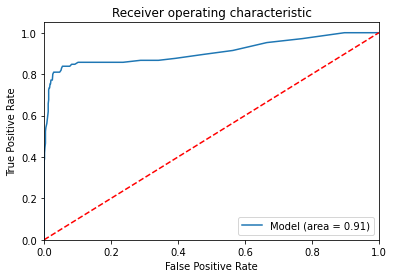

In [ ]:
from sklearn.metrics import roc_curve
# Modifica en el gráfico el 1 por el 0
fpr, tpr, thresholds = roc_curve(y_test, pres_test[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print('Team AUC:', roc_auc)

Team AUC: 0.9073616826703247
